Part 1:
Making the environment
Making the connect 4 game

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

M.shape= (6, 7)
M
 [[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]


Text(0.5, 1.0, 'The board')

<Figure size 640x480 with 0 Axes>

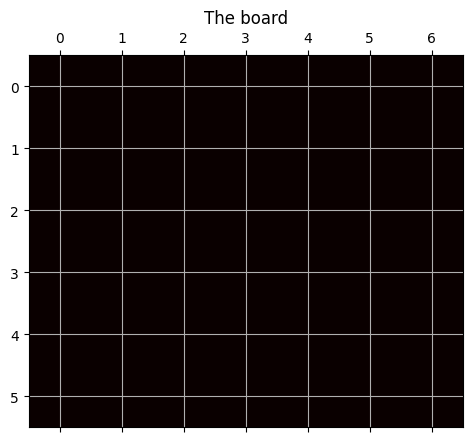

In [11]:
#Defining the rows and columns of Connect 4
nbrows=6
nbcolumns=7
M=np.zeros((nbrows,nbcolumns))

#Print the board
print("M.shape=",M.shape)
print("M\n",M)

#Plot the sticks
fig=plt.figure(1)
plt.matshow(M,cmap='hot')
plt.grid()
plt.title("The board")

In [12]:
A = np.array([0,1,2,3,4,5,6])
S =[]
for i in range(0,nbrows*nbcolumns):
    S.append(i)
S=np.array(S)
print("S.shape=",S.shape)
print("A.shape=",A.shape)
Q1=np.zeros((S.shape[0],A.shape[0]))
Q2=np.zeros((S.shape[0],A.shape[0]))
print("Q1.shape=",Q1.shape)
print("Q2.shape=",Q2.shape)

S.shape= (42,)
A.shape= (7,)
Q1.shape= (42, 7)
Q2.shape= (42, 7)


In [13]:
#Creating board states
def CreateBoardStates(nbrows,nbcolumns):

    #boardstate is a list where all (x,y) are stored.
    boardstate=[]
    count=0
    for y in range(nbrows):
        for x in range(nbcolumns):
            boardstate.append((x,y))
    return boardstate

boardstate=CreateBoardStates(nbrows,nbcolumns)
print("len(boardstate)=",len(boardstate))
print("boardstate\n",boardstate[0:5])

len(boardstate)= 42
boardstate
 [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0)]


In [14]:
#Function to get coordinates
def getXYfromAgentState(agentstate,boardstate):
    xy=boardstate[agentstate]
    return xy


#Printing a few examples of the coordinates
print("agentstate=0 so xy=",getXYfromAgentState(0,boardstate))
print("agentstate=1 so xy=",getXYfromAgentState(1,boardstate))
print("agentstate=2 so xy=",getXYfromAgentState(2,boardstate))
print("agentstate=3 so xy=",getXYfromAgentState(3,boardstate))
print("agentstate=4 so xy=",getXYfromAgentState(4,boardstate))
print("agentstate=5 so xy=",getXYfromAgentState(5,boardstate))
print("agentstate=6 so xy=",getXYfromAgentState(6,boardstate))
print("agentstate=7 so xy=",getXYfromAgentState(7,boardstate))
print("agentstate=8 so xy=",getXYfromAgentState(8,boardstate))
print("agentstate=35 so xy=",getXYfromAgentState(35,boardstate))
print("agentstate=41 so xy=",getXYfromAgentState(41,boardstate))

agentstate=0 so xy= (0, 0)
agentstate=1 so xy= (1, 0)
agentstate=2 so xy= (2, 0)
agentstate=3 so xy= (3, 0)
agentstate=4 so xy= (4, 0)
agentstate=5 so xy= (5, 0)
agentstate=6 so xy= (6, 0)
agentstate=7 so xy= (0, 1)
agentstate=8 so xy= (1, 1)
agentstate=35 so xy= (0, 5)
agentstate=41 so xy= (6, 5)


In [15]:
#Function to get the board state/location from x,y coordinates
def getAgentStateFromXY(x,y,boardstate):
    return boardstate.index((x,y))

#few examples
print("agentstate=",getAgentStateFromXY(0,0,boardstate) ,"so xy=",(0,0))
print("agentstate=",getAgentStateFromXY(1,0,boardstate) ,"so xy=",(1,0))
print("agentstate=",getAgentStateFromXY(2,0,boardstate) ,"so xy=",(2,0))
print("agentstate=",getAgentStateFromXY(3,0,boardstate) ,"so xy=",(3,0))
print("agentstate=",getAgentStateFromXY(4,0,boardstate) ,"so xy=",(4,0))
print("agentstate=",getAgentStateFromXY(5,0,boardstate) ,"so xy=",(5,0))
print("agentstate=",getAgentStateFromXY(6,0,boardstate) ,"so xy=",(6,0))
print("agentstate=",getAgentStateFromXY(0,1,boardstate) ,"so xy=",(0,1))
print("agentstate=",getAgentStateFromXY(1,1,boardstate) ,"so xy=",(1,1))
print("agentstate=",getAgentStateFromXY(6,5,boardstate) ,"so xy=",(6,5))


agentstate= 0 so xy= (0, 0)
agentstate= 1 so xy= (1, 0)
agentstate= 2 so xy= (2, 0)
agentstate= 3 so xy= (3, 0)
agentstate= 4 so xy= (4, 0)
agentstate= 5 so xy= (5, 0)
agentstate= 6 so xy= (6, 0)
agentstate= 7 so xy= (0, 1)
agentstate= 8 so xy= (1, 1)
agentstate= 41 so xy= (6, 5)


In [16]:
# Function the generates a new state from an action
def ComputeNewState(action,M,boardstate):
    y=0
    x=action

    if M[y,x]!=0:
        return -1,x,y

    while y<M.shape[0] and M[y,x]==0:
        y=y+1


    if y>0:
        y=y-1

    newagentstate=getAgentStateFromXY(x,y,boardstate)
    return newagentstate,x,y

(6, 7)
Let us place the tocken in the first column:
newagentstate,x,y 35 0 5
Let us place the tocken in the first column:
newagentstate,x,y 28 0 4
Let us place the tocken in the first column:
newagentstate,x,y 21 0 3
Let us place the tocken in the first column:
newagentstate,x,y 14 0 2
Let us place the tocken in the first column:
newagentstate,x,y 7 0 1
Let us place the tocken in the first column:
newagentstate,x,y 0 0 0


Text(0.5, 1.0, 'The board')

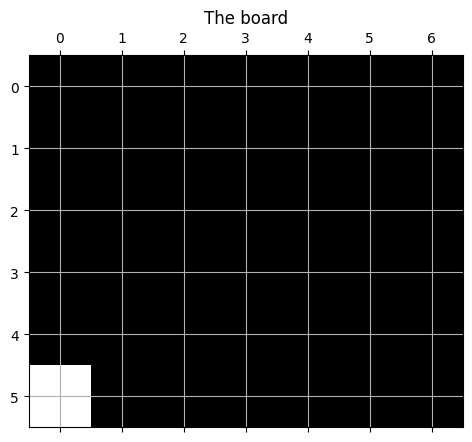

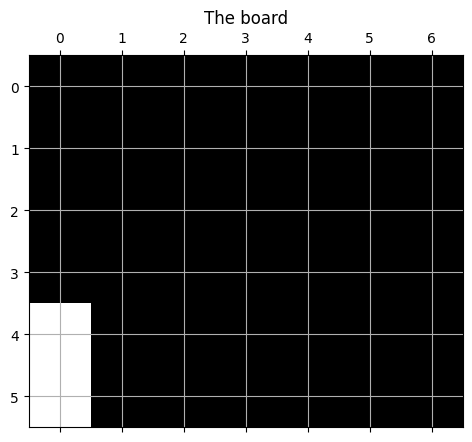

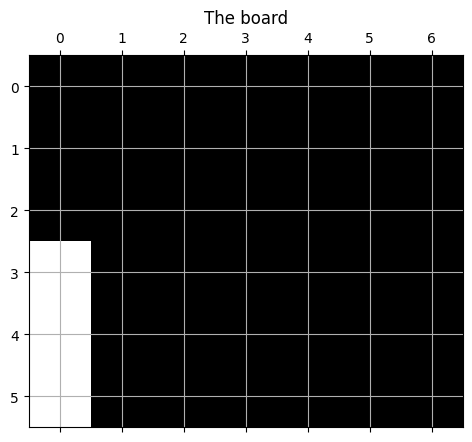

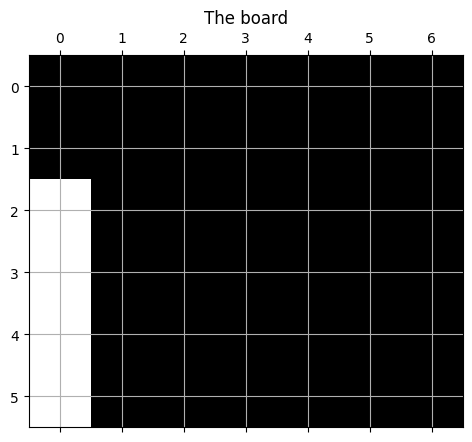

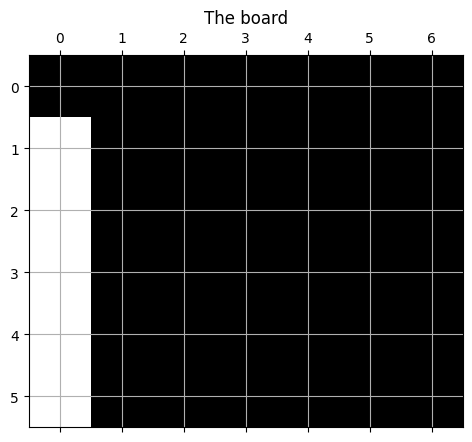

<Figure size 640x480 with 0 Axes>

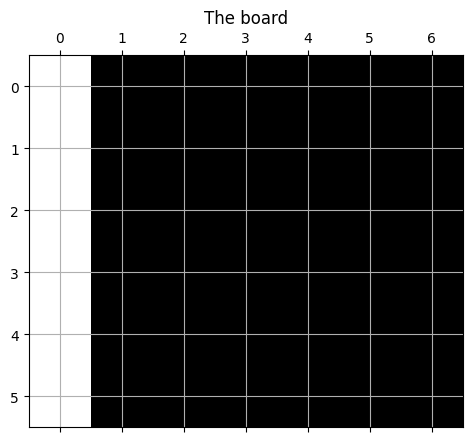

In [21]:
M=np.zeros((nbrows,nbcolumns))
print(M.shape)

print("Let us place the tocken in the first column:")
newagentstate,x,y=ComputeNewState(0,M,boardstate)
print("newagentstate,x,y",newagentstate,x,y)
M[y,x]=1



fig=plt.figure(2)
plt.matshow(M,cmap='gray')
plt.grid()
plt.title("The board")

print("Let us place the tocken in the first column:")
newagentstate,x,y=ComputeNewState(0,M,boardstate)
print("newagentstate,x,y",newagentstate,x,y)
M[y,x]=1


fig=plt.figure(2)
plt.matshow(M,cmap='gray')
plt.grid()
plt.title("The board")



print("Let us place the tocken in the first column:")
newagentstate,x,y=ComputeNewState(0,M,boardstate)
print("newagentstate,x,y",newagentstate,x,y)
M[y,x]=1


fig=plt.figure(2)
plt.matshow(M,cmap='gray')
plt.grid()
plt.title("The board")



print("Let us place the tocken in the first column:")
newagentstate,x,y=ComputeNewState(0,M,boardstate)
print("newagentstate,x,y",newagentstate,x,y)
M[y,x]=1


fig=plt.figure(2)
plt.matshow(M,cmap='gray')
plt.grid()
plt.title("The board")


print("Let us place the tocken in the first column:")
newagentstate,x,y=ComputeNewState(0,M,boardstate)
print("newagentstate,x,y",newagentstate,x,y)
M[y,x]=1


fig=plt.figure(2)
plt.matshow(M,cmap='gray')
plt.grid()
plt.title("The board")


print("Let us place the tocken in the first column:")
newagentstate,x,y=ComputeNewState(0,M,boardstate)
print("newagentstate,x,y",newagentstate,x,y)
M[y,x]=1

#Plot the sticks
fig=plt.figure(2)
plt.matshow(M,cmap='gray')
plt.grid()
plt.title("The board")

In [22]:
#Functions that check for winning and losing the game
def Checkforoneplayer(M,idplayer):
    COLUMN_COUNT=M.shape[1]
    ROW_COUNT=M.shape[0]

    # Check horizontal locations for win
    for c in range(COLUMN_COUNT-3):
        for r in range(ROW_COUNT):
            if M[r][c] == idplayer and M[r][c+1] == idplayer and M[r][c+2] == idplayer and M[r][c+3] == idplayer:
                return True

    # Check vertical locations for win
    for c in range(COLUMN_COUNT):
        for r in range(ROW_COUNT-3):
            if M[r][c] == idplayer and M[r+1][c] == idplayer and M[r+2][c] == idplayer and M[r+3][c] == idplayer:
                return True

    # Check positively sloped diaganols
    for c in range(COLUMN_COUNT-3):
        for r in range(ROW_COUNT-3):
            if M[r][c] == idplayer and M[r+1][c+1] == idplayer and M[r+2][c+2] == idplayer and M[r+3][c+3] == idplayer:
                return True

    # Check negatively sloped diaganols
    for c in range(COLUMN_COUNT-3):
        for r in range(3, ROW_COUNT):
            if M[r][c] == idplayer and M[r-1][c+1] == idplayer and M[r-2][c+2] == idplayer and M[r-3][c+3] == idplayer:
                return True


    return False

def CheckIfWinningGame(M,idplayer):

    winner=False
    #Checking for player one
    winnerid=Checkforoneplayer(M,idplayer)

    return winnerid

In [23]:
#Checking if the function is working correctly
M=np.zeros((nbrows,nbcolumns))

M[0,1]=1
M[1,0]=0
M[2,0]=0
M[2,3]=1
M[1,2]=1
M[3,0]=0
M[3,4]=1
print(M)
print("And player one wins=",CheckIfWinningGame(M,1))
print("And player two wins=",CheckIfWinningGame(M,2))

[[0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
And player one wins= True
And player two wins= False


In [25]:
#The function allows to take an action in the game
def step(action,agentstate,M,playerid,boardstate):
    # Let's take action
    done=False
    reward=0
    newagentstate,xnew,ynew=ComputeNewState(action,M,boardstate)

    #We check if we could move or not to a new state
    #is there any room for a token
    if newagentstate==-1:
        done=True
        reward=-1
        return agentstate,reward,done

    #we place the token to the new empty slot
    M[ynew,xnew]=playerid

    win=False
    win=CheckIfWinningGame(M,playerid)

    if win==True:
        reward=1
        done=True



    return newagentstate,reward,done

In [26]:
M=np.zeros((nbrows,nbcolumns))
print(step(0,0,M,1,boardstate) )
print(M)
print(step(0,35,M,1,boardstate) )
print(M)

(35, 0, False)
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]]
(28, 0, False)
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]]


2 37 37 False
2 30 30 False
1 36 36 False
4 39 39 False
6 41 41 False
2 23 23 False
4 32 32 False
4 25 25 False
0 35 35 False
6 34 34 False
5 40 40 False
3 38 38 False
2 16 16 False
5 33 33 False
3 31 31 False
3 24 24 False
6 27 27 False
3 17 17 False
4 18 18 False
5 26 26 True


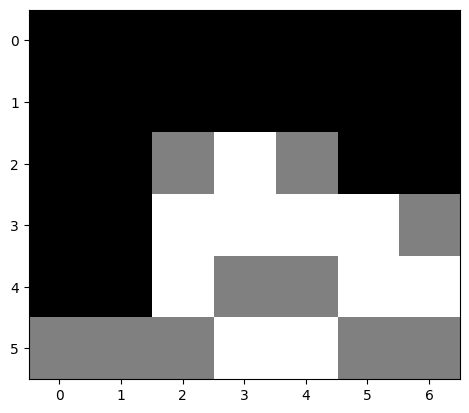

In [28]:
#Using random function to play the game
M=np.zeros((nbrows,nbcolumns))

fig = plt.figure() # just for display

state=0 #initial state of the agent
done=False
listimages=[] # just for display : store images
stepcounter=0
idplayer=1
while done != True: # Move until we reach the end of the game
    action = np.random.choice(A) # Choose a random action
    newtstate,reward,end=step(action,state,M,idplayer,boardstate) # Move according to the move
    state=newtstate # update state
    done=end # update are we done or not ?
    stepcounter=stepcounter+1
    print(action,state,newtstate,end) # print
    im = plt.imshow(M, animated=True,cmap='gray') # display board
    plt.grid()
    listimages.append([im]) # display maze and agent
    idplayer=idplayer+1
    if idplayer==3:
        idplayer=1

In [29]:
from matplotlib import animation, rc
from IPython.display import HTML

ani = animation.ArtistAnimation(fig, listimages, interval=2000, blit=True,
                                repeat_delay=100)


ani.save('RandomConnect4.mp4')

plt.show()
HTML(ani.to_html5_video())

Part 2
Implementing Q learning algorithm

In [36]:
# Choose an action from the espilon greedy policy
def ChooseActionFromPolicy(A,epsilon,Q,state):
    rnd=np.random.random()
    if rnd<epsilon:
        action = np.random.choice(A)
    else:
        action = Q[state,:].argmax()

    return action

# Update the Q table (see equation above)
def UpdateQ(Q,state,action,newstate,reward,alpha,gamma):
    firstterm=(1-alpha)*Q[state,action]
    secondterm=gamma*Q[newstate,:].max()
    thirdterm=alpha*(reward+secondterm)
    res=firstterm+thirdterm
    Q[state,action]=res

In [37]:
#Playing one game to update the Q Table
# Debug function to do some display
def debugfunction(at,s,M,Q1,Q2,epsilon,t,player,listimages):
        #code for display
        ttl = plt.text(3, 43,
                       "Board                               Qtable-Player 1                     Qtable-Player 2"+
                       "\nAction player "+str(player)+"="+str(at)+" and State ="+str(s)+
                       "| Number of games="+str(t)+"| epsilon="+"{:.2f}".format(epsilon)
                       ,horizontalalignment='right', verticalalignment='top', fontsize="small")
        #vmin=0, vmax=1,
        im1 = axarr[0].matshow(M, animated=True,vmax=2,cmap='gray')
        im2 = axarr[1].matshow(Q1, animated=True,cmap='gray')
        im3 = axarr[2].matshow(Q2, animated=True,cmap='gray')
        listimages.append([im1,im2,im3,ttl])

# Let's play one game
def OneGameLearning(A,Q1,Q2,M,epsilon1,espilon2,alpha,gamma,listimages,t,debug):
    if debug==True:
        debugfunction(-1,0,M,Q1,Q2,-1,t,-1,listimages)


    s=0 #initial state
    done = False
    while done != True : # Move until a player lose

        # Player one plays first
        at1= ChooseActionFromPolicy(A,epsilon1,Q1,s) #choose an action
        st1,rt1,end1=step(at1,s,M,1,boardstate) # Move according to the action
        #Update Q1
        UpdateQ(Q1,s,at1,st1,rt1,alpha,gamma)

        #code for debug and display
        if debug==True:
            debugfunction(at1,st1,M,Q1,Q2,epsilon1,t,1,listimages)
         #end code for debug and display

        #player 1 has won
        if end1==True and rt1>0:
            return 1

        #Bad move from player 1 so player 2 has won
        if end1==True and rt1==-1:
            return 2



        # Player two plays
        at2= ChooseActionFromPolicy(A,epsilon2,Q2,st1) #choose an action
        st2,rt2,end2=step(at2,st1,M,2,boardstate) # Move according to the action
        #Update Q2
        UpdateQ(Q2,st1,at2,st2,rt2,alpha,gamma)

        if debug==True and rt2==1:
            debugfunction(at2,st2,M,Q1,Q2,epsilon2,t,2,listimages)

        #player 2 has won
        if end2==True and rt2>0:
            return 2

        #Bad move from player 2 so player 1 has won
        if end2==True and rt2==-1:
            return 1


        s=st2

    return 0

(6, 7)
S= [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
S.shape= (42,)
A= [0 1 2 3 4 5 6]
A.shape= (7,)
Q1.shape= (42, 7)
Q2.shape= (42, 7)
M= [[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
M.shape= (6, 7)
t= 0 epsilon1= 0.3  player  2  wins
t= 1 epsilon1= 0.3  player  2  wins
t= 2 epsilon1= 0.3  player  2  wins
t= 3 epsilon1= 0.3  player  1  wins
t= 4 epsilon1= 0.3  player  1  wins
Fin du QLearning !!!
Percentage of winning games for player one : 40.0


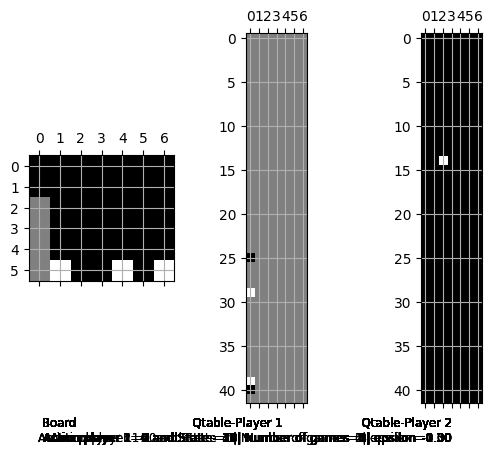

In [52]:
# Player 2 is random player (epsilon=1). He always does exploration.
# He never takes advantage of the knowledge inside the Qtable.

#Training with 5 games
f, axarr = plt.subplots(1,3)
listimages=[] # Just for the animation


axarr[0].grid()
axarr[1].grid()
axarr[2].grid()


#axarr[1].set_yticks(np.arange(0, nbrows*nbcolumns, 1),minor=True)
#axarr[1].set_yticklabels(np.arange(0, nbrows*nbcolumns, 1),minor=True)

#axarr[2].set_yticks(np.arange(0, nbrows*nbcolumns, 1),minor=True)
#axarr[2].set_yticklabels(np.arange(0, nbrows*nbcolumns, 1),minor=True)


####################
# Q learning runnning
####################


#Let's initialize the Q Table
Q1=np.zeros((S.shape[0],A.shape[0]))
Q2=np.zeros((S.shape[0],A.shape[0]))

#Let's initialize the matrix
boardstate=CreateBoardStates(nbrows,nbcolumns)
M=np.zeros((nbrows,nbcolumns))
print(M.shape)

print("S=",S)
print("S.shape=",S.shape)
print("A=",A)
print("A.shape=",A.shape)
print("Q1.shape=",Q1.shape)
print("Q2.shape=",Q2.shape)
print("M=",M)
print("M.shape=",M.shape)


#Let's define some hyper parameters
alpha=0.01 #learing rate
gamma=0.9 #Discount factor
epsilon1=0.3 #probability of exploration we want to get at the end
epsilon2=1 #probability of exploration we want to get at the end
nbgames=5 # The number of trials, number of games


statsnbplayeronewins=0
for t in range(nbgames):
    # run one game
    #Let's initialize the board to 0
    M=np.zeros((nbrows,nbcolumns))
    playeronewins=OneGameLearning(A,Q1,Q2,M,epsilon1,epsilon2,alpha,gamma,listimages,t,True)
    if playeronewins==1:
        statsnbplayeronewins+=1

    print("t=",t, "epsilon1=",epsilon1," player ",playeronewins," wins")
statsnbplayeronewins/=float(nbgames)
statsnbplayeronewins*=100
print("Fin du QLearning !!!")
print("Percentage of winning games for player one : "+str(statsnbplayeronewins))
#f.colorbar(listimages[4][0], ax=axarr[2])

(6, 7)
S= [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
S.shape= (42,)
A= [0 1 2 3 4 5 6]
A.shape= (7,)
Q1.shape= (42, 7)
Q2.shape= (42, 7)
M= [[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
M.shape= (6, 7)
Fin du QLearning !!!
Percentage of winning games for player one : 63.7


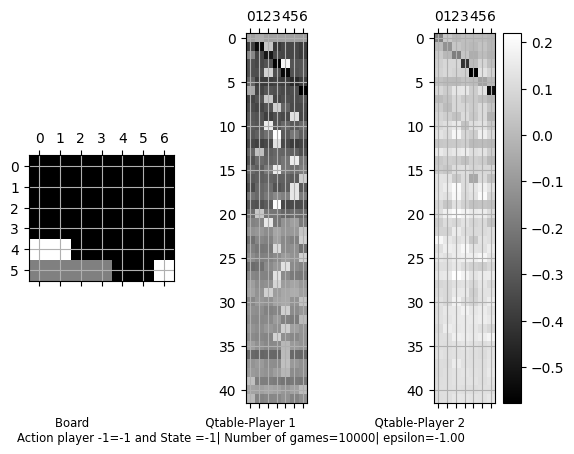

In [53]:
# Running for 10000 games
f, axarr = plt.subplots(1,3)
listimages=[] # Just for the animation


axarr[0].grid()
axarr[1].grid()
axarr[2].grid()



####################
# Q learning runnning
####################


#Let's initialize the Q Table
Q1=np.zeros((S.shape[0],A.shape[0]))
Q2=np.zeros((S.shape[0],A.shape[0]))

#Let's initialize the matrix
boardstate=CreateBoardStates(nbrows,nbcolumns)
M=np.zeros((nbrows,nbcolumns))
print(M.shape)

print("S=",S)
print("S.shape=",S.shape)
print("A=",A)
print("A.shape=",A.shape)
print("Q1.shape=",Q1.shape)
print("Q2.shape=",Q2.shape)
print("M=",M)
print("M.shape=",M.shape)


#Let's define some hyper parameters
alpha=0.01 #learing rate
gamma=0.9 #Discount factor
epsilon1=0.3 #probability of exploration we want to get at the end
epsilon2=1 #probability of exploration we want to get at the end
nbgames=10000 # The number of trials, number of games


statsnbplayeronewins=0
for t in range(nbgames):
    # run one game
    #Let's initialize the board to 0
    M=np.zeros((nbrows,nbcolumns))
    playeronewins=OneGameLearning(A,Q1,Q2,M,epsilon1,epsilon2,alpha,gamma,listimages,t,False)
    if playeronewins==1:
        statsnbplayeronewins+=1

    #print("t=",t, "epsilon1=",epsilon1," player ",playeronewins," wins")
statsnbplayeronewins/=float(nbgames)
statsnbplayeronewins*=100
print("Fin du QLearning !!!")
print("Percentage of winning games for player one : "+str(statsnbplayeronewins))


ttl = plt.text(3, 43,
                       "Board                               Qtable-Player 1                     Qtable-Player 2"+
                       "\nAction player "+str(-1)+"="+str(-1)+" and State ="+str(-1)+
                       "| Number of games="+str(nbgames)+"| epsilon="+"{:.2f}".format(-1)
                       ,horizontalalignment='right', verticalalignment='top', fontsize="small")
        #vmin=0, vmax=1,
im1 = axarr[0].matshow(M, animated=True,cmap='gray')
im2 = axarr[1].matshow(Q1, animated=True,cmap='gray')
im3 = axarr[2].matshow(Q2, animated=True,cmap='gray')
listimages.append([im1,im2,im3,ttl])
f.colorbar(im3,ax=axarr[2])

S= [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
S.shape= (42,)
A= [0 1 2 3 4 5 6]
A.shape= (7,)
Q1.shape= (42, 7)
Q2.shape= (42, 7)
M= [[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [2. 2. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 0. 0. 2.]]
M.shape= (6, 7)
Percentage of winning games for player one : 100.0


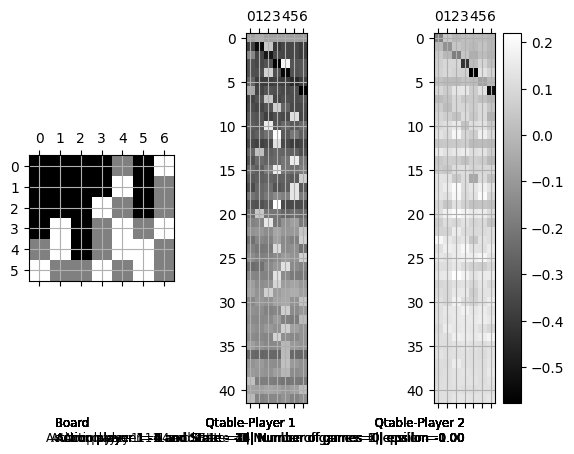

In [54]:
# Game without learning. Player one does exploitation with playyer 2 who plays random
f, axarr = plt.subplots(1,3)
listimages=[] # Just for the animation


axarr[0].grid()
axarr[1].grid()
axarr[2].grid()



####################
# Q learning runnning
####################

print("S=",S)
print("S.shape=",S.shape)
print("A=",A)
print("A.shape=",A.shape)
print("Q1.shape=",Q1.shape)
print("Q2.shape=",Q2.shape)
print("M=",M)
print("M.shape=",M.shape)


#Let's define some hyper parameters
alpha=0.01 #learing rate
gamma=0.9 #Discount factor
epsilon1=0 #probability of exploration we want to get at the end
epsilon2=1 #probability of exploration we want to get at the end
nbgames=1 # The number of trials, number of games


statsnbplayeronewins=0
for t in range(nbgames):
    # run one game
    #Let's initialize the board to 0
    M=np.zeros((nbrows,nbcolumns))
    playeronewins=OneGameLearning(A,Q1.copy(),Q2.copy(),M,epsilon1,epsilon2,alpha,gamma,listimages,t,True)
    if playeronewins==1:
        statsnbplayeronewins+=1

    #print("t=",t, "epsilon1=",epsilon1," player ",playeronewins," wins")
statsnbplayeronewins/=float(nbgames)
statsnbplayeronewins*=100
print("Percentage of winning games for player one : "+str(statsnbplayeronewins))


ttl = plt.text(3, 43,
                       "Board                               Qtable-Player 1                     Qtable-Player 2"+
                       "\nAction player "+str(-1)+"="+str(-1)+" and State ="+str(-1)+
                       "| Number of games="+str(nbgames)+"| epsilon="+"{:.2f}".format(-1)
                       ,horizontalalignment='right', verticalalignment='top', fontsize="small")
        #vmin=0, vmax=1,
im1 = axarr[0].matshow(M, animated=True,cmap='gray')
im2 = axarr[1].matshow(Q1.copy(), animated=True,cmap='gray')
im3 = axarr[2].matshow(Q2.copy(), animated=True,cmap='gray')
listimages.append([im1,im2,im3,ttl])
f.colorbar(im3,ax=axarr[2])

In [56]:
# Strength of player 1 over 10000 games
listimages=[] # Just for the animation



####################
# Q learning runnning
####################

print("S=",S)
print("S.shape=",S.shape)
print("A=",A)
print("A.shape=",A.shape)
print("Q1.shape=",Q1.shape)
print("Q2.shape=",Q2.shape)
print("M=",M)
print("M.shape=",M.shape)


#Let's define some hyper parameters
alpha=0.01 #learing rate
gamma=0.9 #Discount factor
epsilon1=0 #probability of exploration we want to get at the end
epsilon2=1 #probability of exploration we want to get at the end
nbgames=10000 # The number of trials, number of games


statsnbplayeronewins=0
for t in range(nbgames):
    # run one game
    #Let's initialize the board to 0
    M=np.zeros((nbrows,nbcolumns))
    playeronewins=OneGameLearning(A,Q1.copy(),Q2.copy(),M,epsilon1,epsilon2,alpha,gamma,listimages,t,False)
    if playeronewins==1:
        statsnbplayeronewins+=1

    #print("t=",t, "epsilon1=",epsilon1," player ",playeronewins," wins")
statsnbplayeronewins/=float(nbgames)
statsnbplayeronewins*=100
print("Percentage of winning games for player one : "+str(statsnbplayeronewins))

S= [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
S.shape= (42,)
A= [0 1 2 3 4 5 6]
A.shape= (7,)
Q1.shape= (42, 7)
Q2.shape= (42, 7)
M= [[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 2. 0. 0. 0. 0. 1.]
 [1. 2. 0. 0. 2. 0. 1.]
 [1. 1. 1. 2. 2. 2. 2.]]
M.shape= (6, 7)
Percentage of winning games for player one : 70.35
